
# Project: Investigate a Dataset for a patients's scheduled Appointment
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset gathers information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The features of the dataset and their description are given below:

| Features          |Description                               |           
|-------------------| :----------- ----------------------------|
| PatientId         |Patient's unique  Identification          |
| AppointmentID     |Patient's appointment Identification      |
| Gender            |Male or Female.                           |
| ScheduledDay      |The day an appointment was registered     |
| AppointmentDay    |The day of the actuall appointment        |
| Age               |The Patient's age                         |
| Neighbourhood     |Venue of the appointment                  |
| Scholarship       |True or False                             |
| Hipertension      |True or False                             |
| Diabetes          |True or False                             |
| Alcoholism        |True or False                             |
| Handcap           |True or False                             |
| SMS_received      |Message receivd by the Patient            |
| No-show           |True or False                             |


The questions to be explored in this investigation include:
* Is the gender of the patient correlated to missing the appointment
* Is the age of the patient correlated to missing the appointment
* Is not receiving an SMS correlated to missing the appointment

In [55]:
#importing all the packages needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Inspection and Data Wrangling
   * **Data Inspection**
   * **Data Cleansing**
### General Properties

In [56]:
# Data Inspection
df_noshow = pd.read_csv("noshow_appointment.csv")        # loading the dataset
df_noshow.head(3);                                        # loading 3 records of the dataset 
df_noshow.shape;                        # inspecting the number of rows and columns in df_noshow 
#df_noshow.info();                     # Inspecting total entries of each feature and their datatypes
df_noshow.isnull().sum()              # inspecting missing values
sum(df_noshow.duplicated())           # Inspecting duplicate values
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
#Further inspection of some features of the dataset.
df_noshow.iloc[:, 7:11].value_counts()
df_noshow.loc [: , ["Age", "Handcap", "SMS_received", "No-show"]].value_counts()

Age  Handcap  SMS_received  No-show
0    0        0             No         153
49   0        0             No         109
63   0        0             No         105
1    0        0             No          98
59   0        0             No          95
                                      ... 
53   1        1             No           1
                            Yes          1
55   1        0             No           1
     3        0             No           1
98   0        1             No           1
Length: 471, dtype: int64

### Findings from the data Inspection
* The data has no missing and duplicate values
* ScheduledDay and AppointmentDay are of type string and should be converted to datetime types since they are times for the registration of an appointment and the actual appointment.
* Age column has one negative row index
* No-show column name is not given in the right python naming convention(No_show)

### Data Cleaning of the Inspected dataset

In [58]:
df_noshow.rename(columns = {"No-show": "No_show"}, inplace = True)                  # Changing column name of No-show
df_noshow["ScheduledDay"] = pd.to_datetime(df_noshow["ScheduledDay"])               # Changing ScheduledDay to datetime 
df_noshow["AppointmentDay"] = pd.to_datetime(df_noshow["AppointmentDay"])           # Changing AppointmentDay to datetime 
df_noshow.ScheduledDay.dtypes , df_noshow.AppointmentDay.dtypes                     #Confirming if they have been changed
df_noshow.drop(df_noshow.query("Age == -1").index,inplace=True)      # dropping the neagative row index for age
df_noshow["Age"].value_counts()                                      # confirming if the negative row iindex has been removed

0     264
49    165
1     155
63    151
50    149
     ... 
91      4
92      3
94      2
98      2
96      1
Name: Age, Length: 96, dtype: int64

In [59]:
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Is the gender of the patient correlated to missing the appointment?)

#### To achieve this, we will have to : 
* Group the df_noshow dataset using groupby
* Index the resulting dataframe by "No-show" feature
* Count the unique values of each Gender that missed their appointment

In [60]:
# A function to group the dataset by certain features and that returns counts of unique values 
def Feature_count(first_feat,second_feat):
    feat_count = df_noshow.groupby(first_feat)[second_feat].value_counts()
    return(feat_count)       

In [61]:
# Group the dataset by Gender and count the unique values of each Gender 
Gender_values = Feature_count("Gender", "No_show")
Gender_values

Gender  No_show
F       No         3795
        Yes        1033
M       No         2687
        Yes         662
Name: No_show, dtype: int64

**Next the percentage of each gender that missed their appointment will be computed by:** 
 $ \frac{Yes}{No + Yes} \times 100 \% $ 

In [62]:
# Finding the percentages of males and females who missed their appointments
Gender_Female_missed = Gender_values[1]/(Gender_values[0]+Gender_values[1])*100
Gender_Male_missed = Gender_values[3]/(Gender_values[3]+Gender_values[2])*100
print("The percentage of females who missed their appointment: {:.2f}%".format(Gender_Female_missed))
print("The percentage of males who missed their appointment: {:.2f}% ".format(Gender_Male_missed))

The percentage of females who missed their appointment: 21.40%
The percentage of males who missed their appointment: 19.77% 


**Finally we will plot a stacked bar chart to see how Gender correlates with missed appointments**
* The dataframe is first grouped by gender and indexed by No_show columns before counting the number of unique 
  gender and no_show values in the dataframe 
* Next the data is unstacked and then plotted as a stacked bar

Text(0.5, 1.0, 'Percentage of male and females in the dataset')

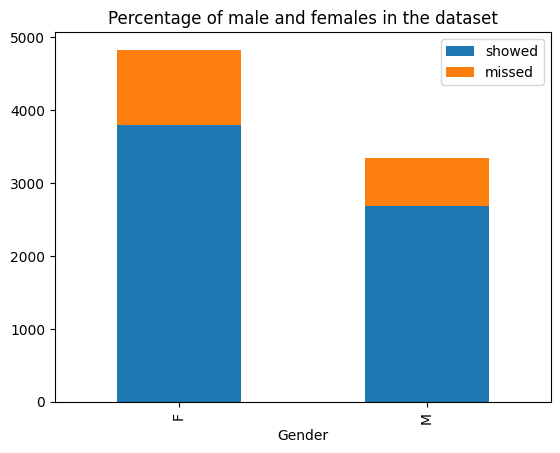

In [63]:
Gender_values.unstack().plot(kind="bar",stacked=True)
plt.legend(["showed","missed"]);
plt.title("Percentage of male and females in the dataset")

**Findings of analysis from research question 1:**
* As seen from the computations and bar graph above,the percentage of male and female who missed their appointments is alsmost   the same
* More females showed up for an appointment than the males
* It is difficult to conclude that the gender of the patient correlated with their missing appointments.

### Research Question 2  (Is the age of the patient correlated to missing the appointment?)

#### To achieve this, we will have to : 
* Filter out (i.e. mask) patients that showed up for their appointmnet and those that did not
* Plot a Histogram for the ages of patients based on our filtering 
* Finding the percentages mean value of Age groups who missed or showed up for their appointments

In [64]:
df_noshow.info();
patient_missed = df_noshow[df_noshow["No_show"]== "Yes"]           # Filtering out based on No_show"== "Yes"
patient_showed = df_noshow[df_noshow["No_show"] == "No"]           # Filtering out based on No_show"== "No"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 0 to 8191
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       8192 non-null   float64            
 1   AppointmentID   8192 non-null   int64              
 2   Gender          8187 non-null   object             
 3   ScheduledDay    8178 non-null   datetime64[ns, UTC]
 4   AppointmentDay  8179 non-null   datetime64[ns, UTC]
 5   Age             8192 non-null   int64              
 6   Neighbourhood   8182 non-null   object             
 7   Scholarship     8192 non-null   int64              
 8   Hipertension    8192 non-null   int64              
 9   Diabetes        8192 non-null   int64              
 10  Alcoholism      8192 non-null   int64              
 11  Handcap         8192 non-null   int64              
 12  SMS_received    8192 non-null   int64              
 13  No_show         8182 non-null   o

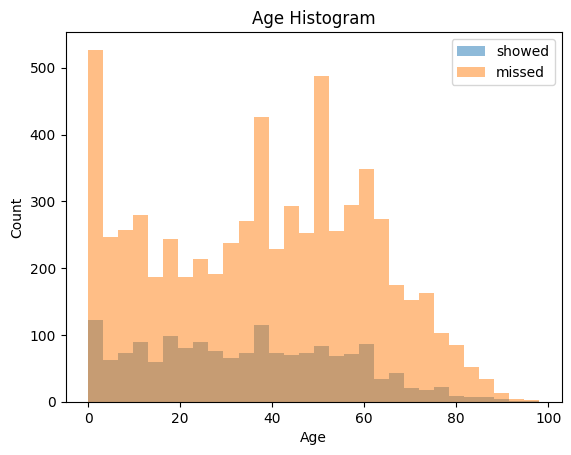

In [65]:
# histogram for ages of patients
patient_missed.Age.plot(kind = "hist", bins=30, alpha = 0.5)
patient_showed.Age.plot(kind = "hist", bins = 30, alpha = 0.5)
plt.legend(["showed","missed"] );
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

In [66]:
Age_count = Feature_count("Age", "No_show")    # value counts for patients who did not show up grouped by Age
Age_count.index                                   # Finding the index of Age_count ---which returns a multindex series
Age_count.groupby(level = 0).sum()                # Group Age_count by the first index in Age_count.index and find the sum     

Age
0     262
1     155
2     119
3     114
4      86
     ... 
91      4
92      3
94      2
96      1
98      2
Name: No_show, Length: 96, dtype: int64

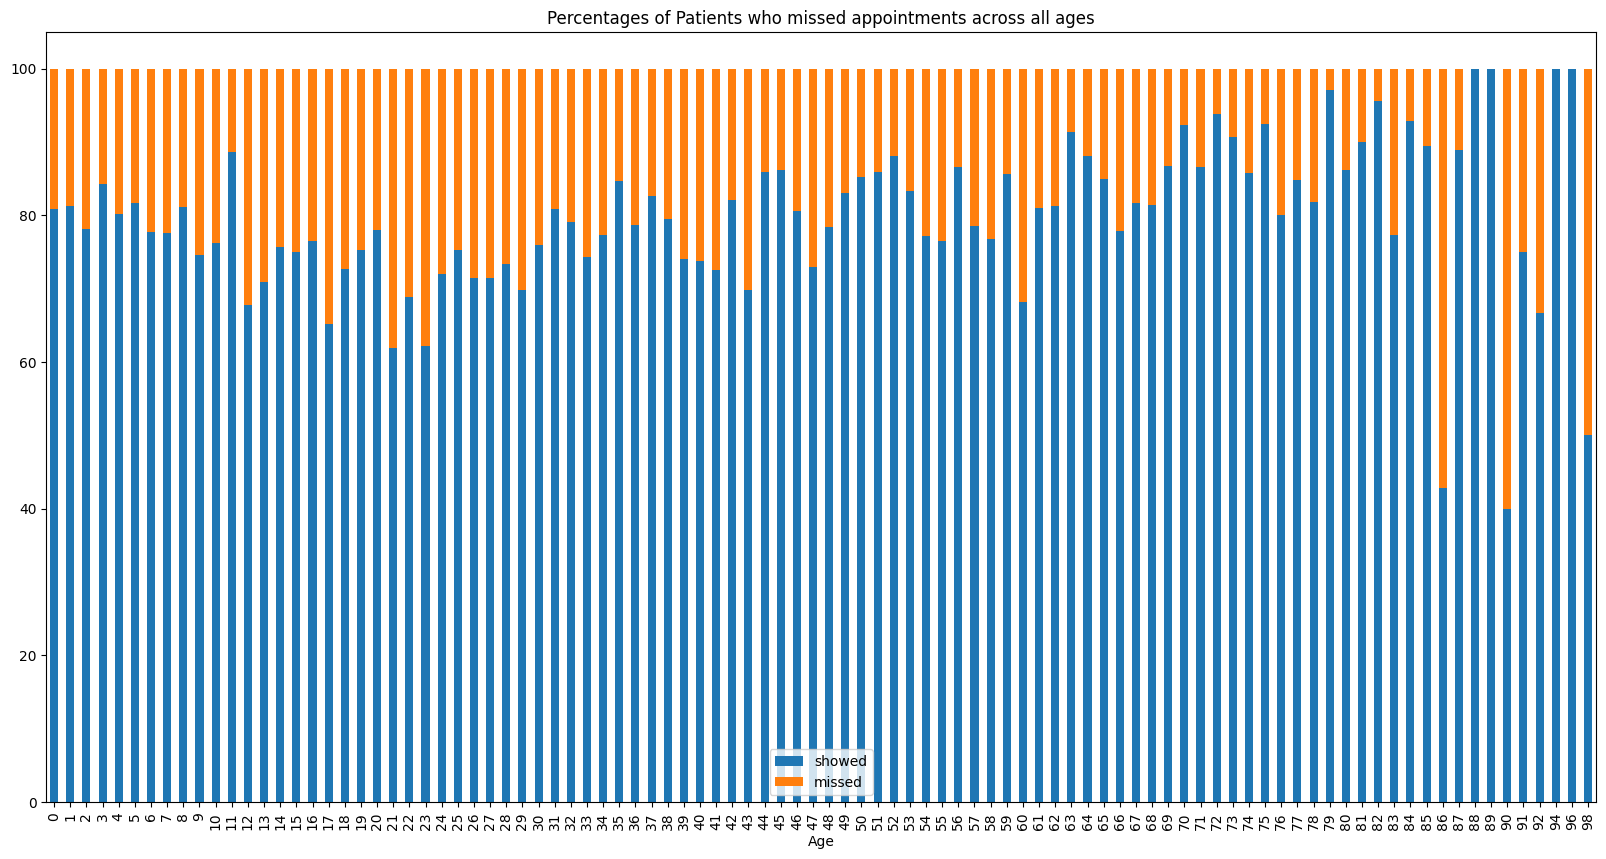

In [67]:
# Finding the percentages of Age groups who missed their appointments and visualizing the result on a bar chart
Age_missed = Age_count / Age_count.groupby(level=0).sum() * 100;
Age_missed.unstack().plot(kind="bar",stacked=True, figsize=(20,10));
plt.legend(["showed","missed"]);
plt.title("Percentages of Patients who missed appointments across all ages");

In [68]:
# The mean value of percentage of age for patient that miss thier appointment
mean_patient_missing = (Age_count / Age_count.groupby(level=0).sum() * 100).unstack().Yes.mean()
print("The mean percentage value of patient missig their appointment across all ages is : {:.2f} % ".format(mean_patient_missing))

The mean percentage value of patient missig their appointment across all ages is : 21.25 % 


In [69]:
# The mean value of percentage of age for patient that showed up for thier appointment
mean_patient_showing = (Age_count / Age_count.groupby(level=0).sum() * 100).unstack().No.mean() 
print("The mean percentage value of patient showing up for their appointment across all ages is : {:.2f} % ".format(mean_patient_showing))

The mean percentage value of patient showing up for their appointment across all ages is : 79.63 % 


### increasing the width interval of bars and plot a bar graph to improve visibility of the Age groups who missed their appointments 

Text(0.5, 1.0, 'Prcentage of Patients Missing appointment across ages')

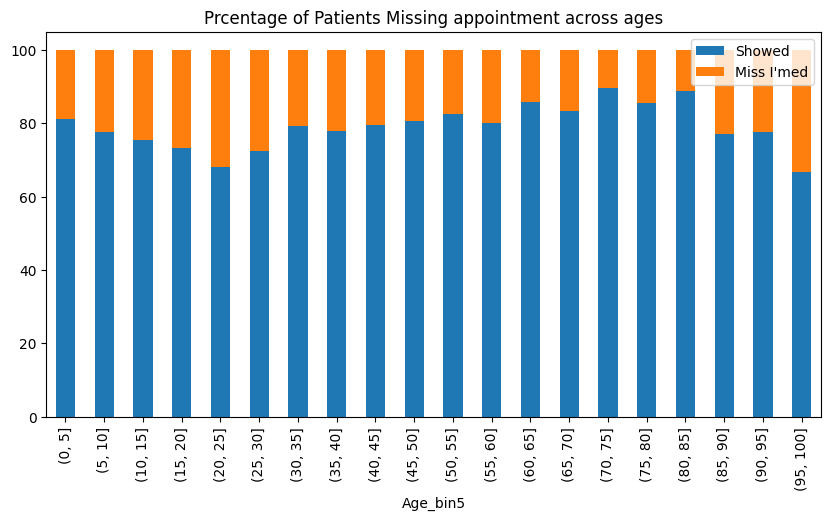

In [70]:
bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df_noshow["Age_bin5"] = pd.cut(df_noshow.Age, bins=bins)
df_noshow.groupby("Age_bin5")["No_show"].unique()          # checks unique values of the group formed
Age5_count = df_noshow.groupby("Age_bin5")["No_show"].value_counts() 
(Age5_count/Age5_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True, figsize = (10,5))
plt.legend(["Showed","Miss I'med"]);
plt.title("Prcentage of Patients Missing appointment across ages")

**Findings of analysis from research question 2:**
* The mean of patient missing an appointment across all ages (19.85%) is less than that of patients who showed up for their       appointment across all ages (80.73 % ).
* Patients that missed their appointments increased by at least 18% in the age range 10 to 20 years


### Research Question 3  (Is not receiving an SMS correlated to missing the appointment?)

#### To achieve this, we will have to : 
* Find the percentage of patients that did and did not receive SMS
* Find out if receiving SMs makes a patient show up for an appointment 
* Visualize the percentage of patients who showed up after receiving an SMS

0    5392
1    2800
Name: SMS_received, dtype: int64

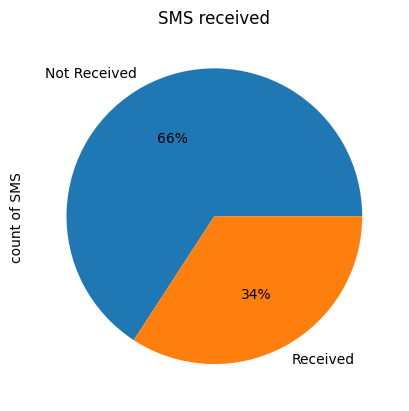

In [71]:
SMS_count=df_noshow["SMS_received"].value_counts()                # count the unique values of patients that recieved SMS or not
SMS_count.plot(kind="pie", labels=["Not Received","Received"], autopct='%1.0f%%')      # Plotting the SMS_count on a pie chart
plt.ylabel("count of SMS")
plt.title("SMS received");
SMS_count

In [52]:
SMS_YN_count = df_noshow.groupby("SMS_received")["No_show"].value_counts()
SMS_YN_count

SMS_received  No_show
0             No         4449
              Yes         933
1             No         2038
              Yes         762
Name: No_show, dtype: int64

In [72]:
# Finding the percentages of patients who missed and showed up at their appointments after recieving SMS
SMS_proportion = (SMS_YN_count / SMS_YN_count.groupby(level=0).sum() * 100).unstack()
SMS_proportion.index = ["Not Received", "Received"]
SMS_proportion

No_show,No,Yes
Not Received,82.664437,17.335563
Received,72.785714,27.214286


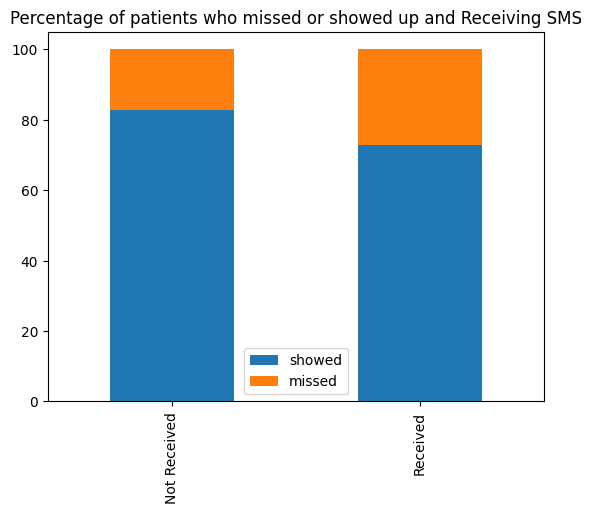

In [73]:
SMS_proportion.plot(kind="bar",stacked=True)
plt.legend(["showed","missed"])
plt.title("Percentage of patients who missed or showed up and Receiving SMS");

**Findings of analysis from research question 3:**
* The percentage of patients that received SMS(68%) is higher than thiose who did not receive(32%)
* The patients who received an SMS have a higher percentage of missing the appointments 27.6% to those who didn't 16.7%.
* Based on the data, the likelihood of patients to show up for appointments is not based on receiving SMS

<a id='conclusions'></a>
## Conclusions

The correlation between Three features of the dataset was analysed with regards to whether patients missed or showed up for their appointment. And the results obtained for these analyses include:
* More females showed up for an appointment than the males
* It is difficult to conclude that the gender of the patient correlated with their missing appointments.
* The percentage of patients that received SMS(68%) is higher than thiose who did not receive(32%)
* The patients who received an SMS have a higher percentage of missing the appointments 27.6% to those who didn't 16.7%.
* The likelihood of patients to show up for appointments is not based on receiving SMS.
* The mean of patient missing an appointment across all ages (19.85%) is less than that of patients who showed up for their       appointment across all ages (80.73 % ).
* Patients that missed their appointments increased by at least 18% in the age range 10 to 20 years.

## Limitations
* Th data collection technique was not explained which could have aided the anlysis
* Some features of the dataset like SMS_received and Handicap were not properly explained
* The reason for patients' visit to the doctor was not explained; this coulc give more insightwhy a greater percentasge missed   their appointments

### Website consulted : https://www.kaggle.com/